Link Google Colab with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
import math

#visualize
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [3]:
from scipy import stats
from scipy.stats import norm

Open files

In [4]:
folder_path = '/content/drive/MyDrive/Black_Friday/'
df_train = pd.read_csv(folder_path + 'train.csv')
df_test = pd.read_csv(folder_path + 'test.csv')

Data analysis

In [5]:
df_train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


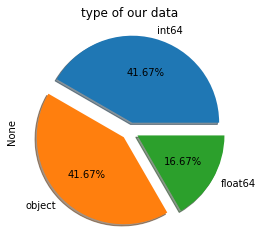

In [7]:
df_train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

In [8]:
df_train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


Find missing data

In [9]:
missing_values=df_train.isnull().sum()
percent_missing = df_train.isnull().sum()/df_train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


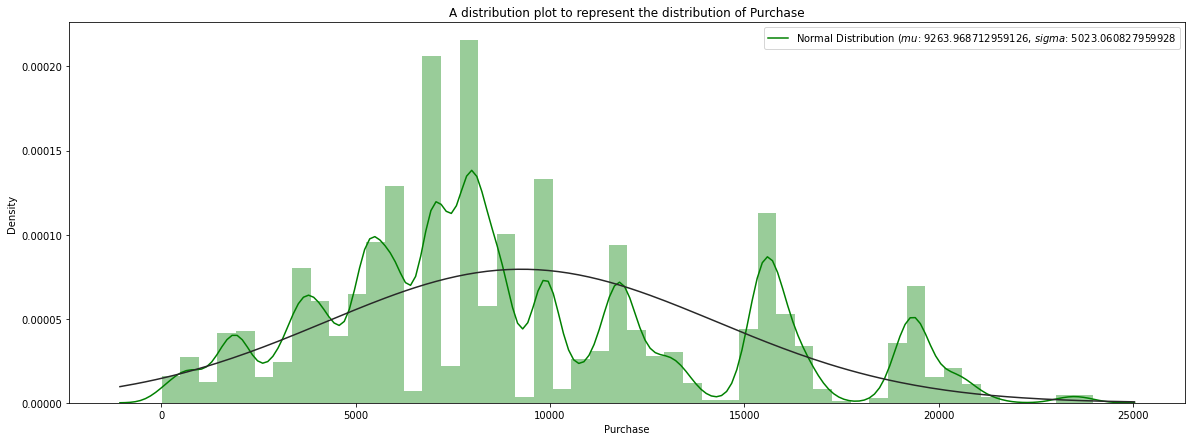

In [10]:
# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(df_train['Purchase'], color = 'green', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(df_train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

Selecting and encoding data

In [11]:
train = df_train.drop(['Product_ID','User_ID'],axis=1)
train['Product_Category_2'].fillna(train['Product_Category_2'].mean(),inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0],inplace=True)
lb_maker = LabelEncoder()
train['Gender'] = lb_maker.fit_transform(train['Gender'])
train['Age'] = lb_maker.fit_transform(train['Age'])
train['City_Category'] = lb_maker.fit_transform(train['City_Category'])
train['Stay_In_Current_City_Years'] = lb_maker.fit_transform(train['Stay_In_Current_City_Years'])

Other way to encoding data

In [12]:
train = df_train.drop(['Product_ID','User_ID'],axis=1)
train['Product_Category_2'].fillna(train['Product_Category_2'].mean(),inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].mean(),inplace=True)
train['Average_Cost'] = df_train.groupby(['Product_ID'])['Purchase'].transform('mean')
train['Buying_Power'] =  df_train.groupby(['User_ID'])['Purchase'].transform('mean')
#Encode a range of age as a mean of this range
train['Age'] = train['Age'].replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[9,22,31,41,48,53,60])
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace(['0', '1', '2', '3', '4+'],[0,1,2,3,4])
train['Gender'] = train['Gender'].replace(['M','F'],[0,1])
train['City_Category'] = train['City_Category'].replace(['A','B','C'],[1,2,3])


In [13]:
train['Stay_In_Current_City_Years'].unique()


array([2, 4, 3, 1, 0])

Split data


In [14]:
X = train.drop('Purchase', axis = 1)
y = train.Purchase
print(X.shape)
print(y.shape)

(550068, 11)
(550068,)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

Features scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

RandomForestRefressor()

In [17]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(model1.predict(X_train), y_train)))
print(math.sqrt(mean_squared_error(model1.predict(X_test), y_test)))

952.8575197698539
2554.166111604448


Overfiting with the second way of encoding, for the first way: the result is about 3000

XGBoost

[15:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2297.645477921016
2482.0798754977254


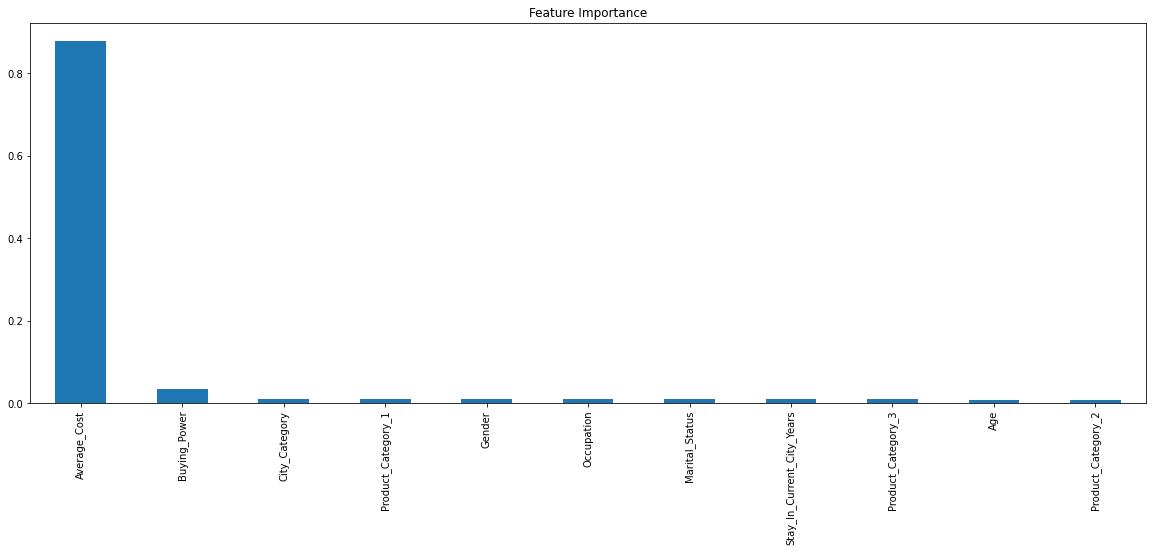

In [18]:
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42,n_estimators= 61, max_depth=11)
model3.fit(X_train,y_train)
print(math.sqrt(mean_squared_error(model3.predict(X_train), y_train)))
print(math.sqrt(mean_squared_error(model3.predict(X_test), y_test)))
features = pd.Series(model3.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

As we see, we have a problem with the data that this data is too dependent on one feature (both adding or non-adding 2 new features) 

XGBoost applied KFold

In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    xtr,xts = X.iloc[train_index],X.iloc[test_index]
    ytr,yts = y.iloc[train_index],y.iloc[test_index]
model4 = XGBRegressor(random_state=1,n_estimators= 61, max_depth=11)
model4.fit(xtr,ytr)
print(math.sqrt(mean_squared_error(model4.predict(xtr), ytr)))
print(math.sqrt(mean_squared_error(model4.predict(xts), yts)))

[15:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2302.96534785193
2478.5516721660947


LGBMRegressor()

In [20]:
from sklearn.metrics import make_scorer
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())
rmse_score = make_scorer(rmse, greater_is_better=False)

In [21]:
categorical_columns = ["Gender", "Occupation", "City_Category", "Stay_In_Current_City_Years",
                       "Marital_Status", "Product_Category_1", "Product_Category_2", "Product_Category_3"]
model4 = LGBMRegressor(metric = 'rmse', categorical_columns = categorical_columns,subsample = 0.5, num_leaves = 500, num_iterations =200,  random_state=0 )
param_test ={'learning_rate' : [0.05,0.1,0.2,0.3]}

Total_sets = 100
#search for the best parameter
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(
    estimator=model4, param_distributions=param_test, 
    n_iter=Total_sets,
    scoring=rmse_score,
    cv=4,
    refit=True,
    random_state=314,
    n_jobs = 4,
    verbose=True)
gs.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(-1*gs.best_score_, gs.best_params_))
y_pred  = gs.predict(X_test)
score =  rmse(y_pred,y_test)


Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Best score reached: 2463.2148074103334 with params: {'learning_rate': 0.05} 


We reach the best result when we apply RandomizedSearchCV (Randomized search on hyper parameters) with LGBMRegressor (A Scikit-learn API)